In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

In [5]:
df = pd.read_excel(r'raw_data.xls')

In [6]:
df.head()

,Наименование,Количество,Сумма продажи,Прибыль,Дата
0,Аджика домашняя 260гр,2.0,130.00,46.00,2020-11-02
1,"Ацидофилин 2,7% 200г.ВМК БЗМЖ",4.0,71.81,9.85,2020-11-02
2,Батон ГОРЧИЧНЫЙ 300 г. Хлебозавод №1 +,21.0,419.90,81.38,2020-11-02
3,Батон Луковый 300г.Орион,2.0,57.93,11.93,2020-11-02
4,Батон НАРЕЗНОЙ 400 г. Хлебозавод №1 +,41.0,901.19,192.71,2020-11-02


In [8]:
df = df.rename(columns={'Наименование': 'name',
                        'Количество': 'quantity', 
                        'Сумма продажи': 'total_sum', 
                        'Прибыль': 'income', 
                        'Дата': 'date'})

In [11]:
df.shape

(2510, 5)

In [15]:
df.isna().sum()

name         0
quantity     0
total_sum    0
income       0
date         0
dtype: int64

In [16]:
df.dtypes

name                 object
quantity            float64
total_sum           float64
income              float64
date         datetime64[ns]
dtype: object

In [17]:
df['price'] = (df.income / df.quantity).round(2)
df['day'] = df.date.apply(lambda x: x.day)
df['category'] = df.name.apply(lambda x: x.split()[0])
df['week_day'] = df.date.apply(lambda x: x.weekday())

In [18]:
df.head()

,name,quantity,total_sum,income,date,price,day,category,week_day
0,Аджика домашняя 260гр,2.0,130.00,46.00,2020-11-02,23.00,2,Аджика,0
1,"Ацидофилин 2,7% 200г.ВМК БЗМЖ",4.0,71.81,9.85,2020-11-02,2.46,2,Ацидофилин,0
2,Батон ГОРЧИЧНЫЙ 300 г. Хлебозавод №1 +,21.0,419.90,81.38,2020-11-02,3.88,2,Батон,0
3,Батон Луковый 300г.Орион,2.0,57.93,11.93,2020-11-02,5.96,2,Батон,0
4,Батон НАРЕЗНОЙ 400 г. Хлебозавод №1 +,41.0,901.19,192.71,2020-11-02,4.70,2,Батон,0


In [19]:
# There are too many categories; model will be overfitted
df.category.unique()

array(['Аджика', 'Ацидофилин', 'Батон', 'Батончик', 'Беляш', 'Бифидок',
       'Булка', 'Булочка', 'Булочки', 'Ватрушка', 'Йогурт', 'Йогуртный',
       'Кефир', 'Коктейль', 'Котлета', 'Лаваш', 'Майонез', 'Маргарин',
       'Масло', 'Молоко', 'Напиток', 'Палочка', 'Пампушки', 'Пирог',
       'Пицца', 'Плавленной', 'Плавленый', 'Плетенка', 'Плюшка',
       'Пончики', 'Продукт', 'Простокваша', 'Ромашка', 'Ромовая',
       'Ряженка', 'Сгущенка', 'Сливки', 'Слойка', 'Сметана', 'Сметанный',
       'Снежок', 'Сосиска', 'Соус', 'Сыр', 'Сырный', 'Сырок', 'Творог',
       'Творожная', 'Хачапури', 'Хлеб', 'Хлеб-е', 'Чиабатта', 'Шанежки',
       'Желе', 'Рожок', 'ХБИ', 'Майонезный', 'Масса', 'Сгущеночка',
       'Обереженка', 'Пироженое', 'Творожок', 'Палочки', 'Пуддинг',
       'Сырки'], dtype=object)

In [20]:
# Deleting of redundant info
df = df.query('category != "Ромашка" and category != "Аджика" and category != "Желе"')

In [21]:
# Creating of more extensive categories
df['bread'] = np.where(df.category.apply(lambda x: x in [
    'Батон', 'Батончик', 'Булка', 'Булочка', 'Булочки', 'Пампушки', 'Хлеб', 'Хлеб-е', 'Чиабатта', 'ХБИ', 'Лаваш', 'Плетенка'
    ]), 1, 0)
df['hotcake'] = np.where(df.category.apply(lambda x: x in [
    'Беляш', 'Ватрушка', 'Котлета', 'Пирог', 'Пицца', 'Плюшка', 'Пончики', 'Ромовая', 'Слойка', 'Сосиска', 
    'Хачапури', 'Шанежки', 'Рожок', 'Пироженое']), 1, 0)
df['milk_or_sour_milk'] = np.where(df.category.apply(lambda x: x in [
    'Ацидофилин', 'Бифидок', 'Йогурт', 'Йогуртный', 'Кефир', 'Коктейль', 'Молоко', 'Напиток', 'Ряженка', 
    'Сливки', 'Снежок', 'Обереженка', 'Простокваша']), 1, 0)
df['cheese_cottage_cheese'] = np.where(df.category.apply(lambda x: x in [
    'Палочка', 'Продукт', 'Сырок', 'Творог', 'Плавленной', 'Плавленый', 'Сыр', 'Сырный', 
    'Творожная', 'Масса', 'Творожок', 'Палочки', 'Сырки']), 1, 0)
df['others'] = np.where(df.category.apply(lambda x: x in [
    'Майонез', 'Маргарин', 'Масло', 'Сгущенка', 'Соус', 'Сметана', 'Сметанный', 'Майонезный', 'Сгущеночка', 
    'Пуддинг']), 1, 0)

<AxesSubplot: >

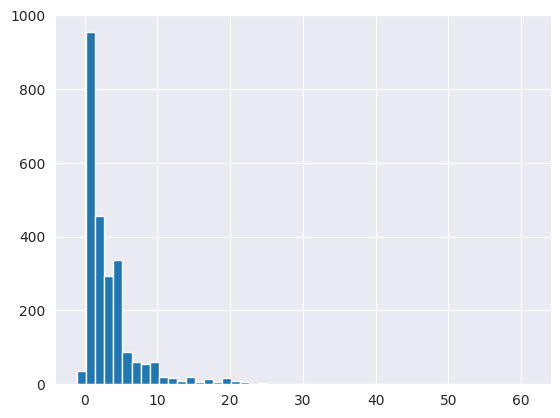

In [22]:
# Hist of target variable
df.quantity.hist(bins=50)

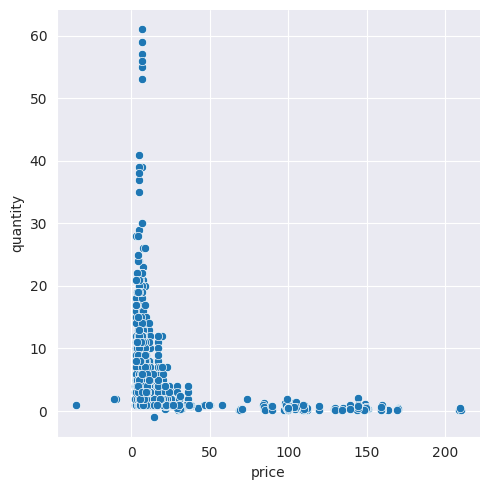

In [23]:
# Plot of quantity's dependence on price
sns.relplot(x='price', y='quantity', data=df)

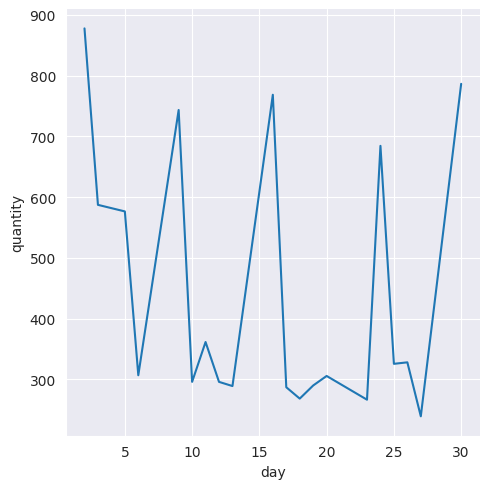

In [24]:
# The graph of the dependence of the number of sales on the date tells us that there is no obvious relationship between these parameters
# At the same time, we see jumps in sales; we can assume that there is a dependence of the number of sales on the day of the week
sns.relplot(x='day', y='quantity', kind='line', data=df.groupby('day', as_index=False).agg({'quantity': 'sum'}))

<AxesSubplot: xlabel='week_day', ylabel='quantity'>

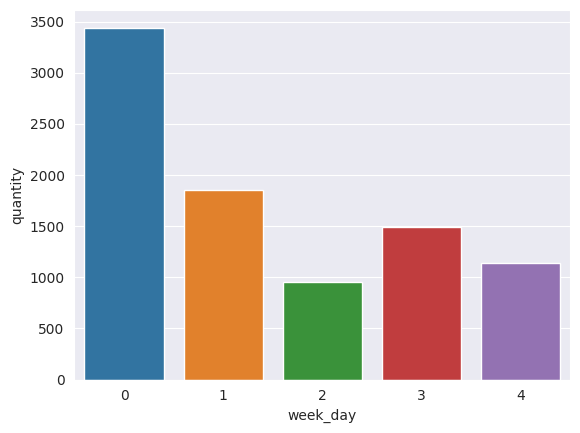

In [25]:
# Histogram of the dependence of sales on the day of the week (unfortunately, not all days of the week are represented in the data)
# It can be seen from the histogram that our assumption is correct, and, therefore, the day of the week can be used as another sign
df_by_week_day = df.groupby('week_day', as_index=False).agg({'quantity': 'sum'})
sns.barplot(x='week_day', y='quantity', data=df_by_week_day)

/tmp/ipykernel_2178/583318640.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl.set_xticklabels(pl.get_xticklabels())


[Text(0.0, 0, '0.00'),
 Text(0.05, 0, '0.05'),
 Text(0.1, 0, '0.10'),
 Text(0.15000000000000002, 0, '0.15'),
 Text(0.2, 0, '0.20'),
 Text(0.25, 0, '0.25'),
 Text(0.30000000000000004, 0, '0.30')]

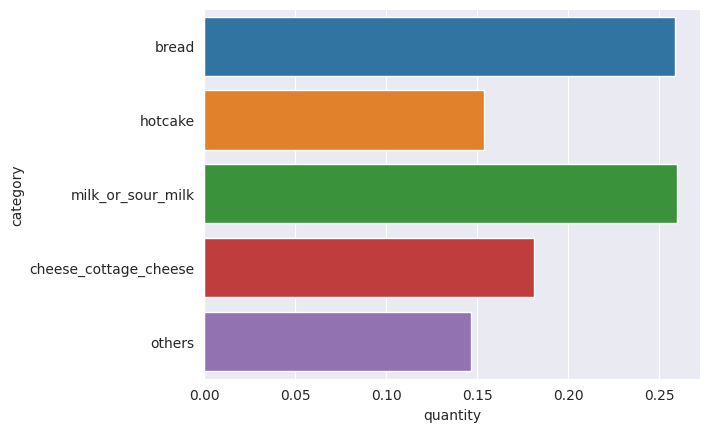

In [32]:
products_categories = pd.DataFrame({'quantity': pd.Series(
    [df.bread.mean(), df.hotcake.mean(), df.milk_or_sour_milk.mean(), df.cheese_cottage_cheese.mean(), df.others.mean()]), 
    'category': pd.Series(['bread', 'hotcake', 'milk_or_sour_milk', 'cheese_cottage_cheese', 'others'])})
pl = sns.barplot(x='quantity', y='category', data=products_categories)
pl.set_xticklabels(pl.get_xticklabels(), rotation=30)

In [34]:
df = df.drop(['total_sum', 'income', 'date', 'category'], axis=1)

In [35]:
# Let's apply one-hot encoding for the days of the week
df = pd.get_dummies(df, columns=['week_day'])

In [36]:
df.to_csv('data.csv', index=False)